# Синий уровень

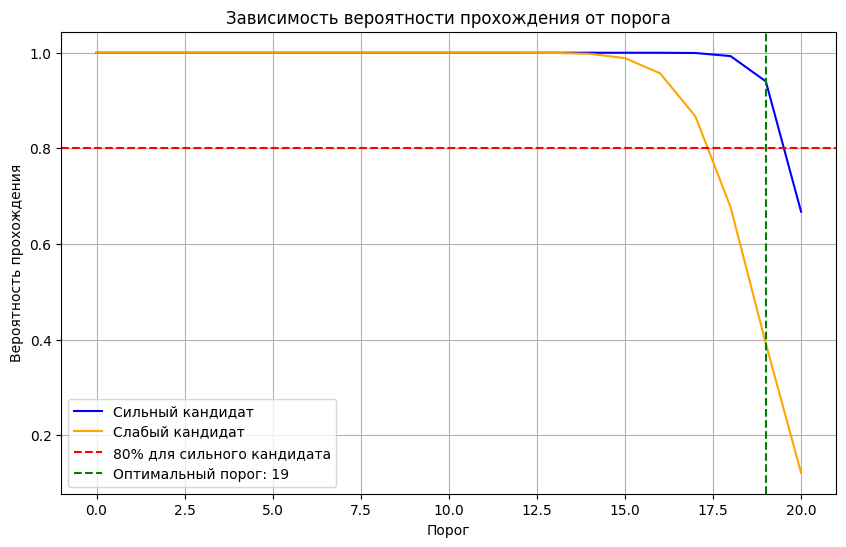

Оптимальный порог: 19


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Параметры
n_questions = 20
p_strong = 0.98
p_weak = 0.90
thresholds = np.arange(0, n_questions + 1)
prob_strong = 1 - binom.cdf(thresholds - 1, n_questions, p_strong)
prob_weak = 1 - binom.cdf(thresholds - 1, n_questions, p_weak)
valid_thresholds = thresholds[prob_strong >= 0.80]
if valid_thresholds.size > 0:
    optimal_threshold_index = np.argmin(prob_weak[prob_strong >= 0.80])
    optimal_threshold = valid_thresholds[optimal_threshold_index]
else:
    optimal_threshold = None

plt.figure(figsize=(10, 6))
plt.plot(thresholds, prob_strong, label='Сильный кандидат', color='blue')
plt.plot(thresholds, prob_weak, label='Слабый кандидат', color='orange')
plt.axhline(y=0.80, color='red', linestyle='--', label='80% для сильного кандидата')
if optimal_threshold is not None:
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', label=f'Оптимальный порог: {optimal_threshold}')
plt.xlabel('Порог')
plt.ylabel('Вероятность прохождения')
plt.title('Зависимость вероятности прохождения от порога')
plt.legend()
plt.grid(True)
plt.show()
if optimal_threshold is not None:
    print(f"Оптимальный порог: {optimal_threshold}")
else:
    print("Не удалось найти оптимальный порог.")

# Красный уровень

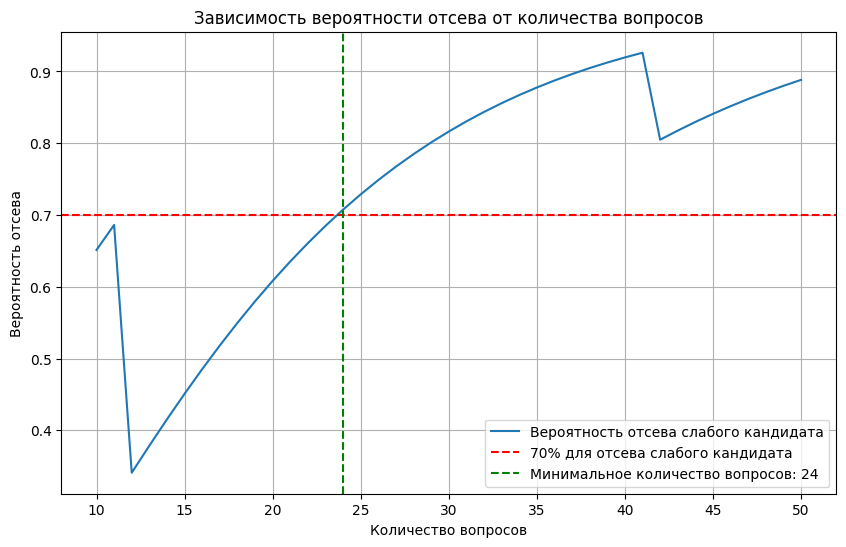

Минимальное количество вопросов: 24


In [3]:
# Задание вероятностей
p_strong = 0.98
p_weak = 0.90
min_questions = 10
max_questions = 50
questions_range = np.arange(min_questions, max_questions + 1)
prob_reject_weak = np.zeros(len(questions_range))

for i, n_questions in enumerate(questions_range):
    thresholds = np.arange(0, n_questions + 1)
    prob_strong = 1 - binom.cdf(thresholds - 1, n_questions, p_strong)
    prob_weak = 1 - binom.cdf(thresholds - 1, n_questions, p_weak)
    valid_thresholds = thresholds[prob_strong >= 0.80]

    if len(valid_thresholds) > 0:
        optimal_threshold_index = np.argmin(prob_weak[prob_strong >= 0.80])
        optimal_threshold = valid_thresholds[optimal_threshold_index]
        prob_reject_weak[i] = binom.cdf(optimal_threshold - 1, n_questions, p_weak)
    else:
        prob_reject_weak[i] = 0

min_questions_needed = questions_range[prob_reject_weak >= 0.70][0]
plt.figure(figsize=(10, 6))
plt.plot(questions_range, prob_reject_weak, label='Вероятность отсева слабого кандидата')
plt.axhline(y=0.70, color='r', linestyle='--', label='70% для отсева слабого кандидата')
plt.axvline(x=min_questions_needed, color='g', linestyle='--', label=f'Минимальное количество вопросов: {min_questions_needed}')
plt.xlabel('Количество вопросов')
plt.ylabel('Вероятность отсева')
plt.title('Зависимость вероятности отсева от количества вопросов')
plt.legend()
plt.grid(True)
plt.show()
print(f"Минимальное количество вопросов: {min_questions_needed}")

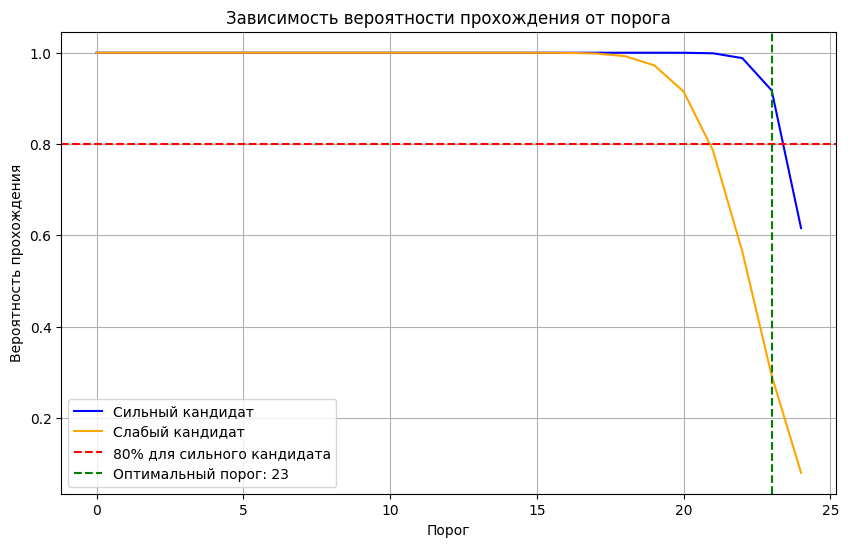

Оптимальный порог: 23


In [5]:
n_questions = 24
p_strong = 0.98
p_weak = 0.90
thresholds = np.arange(0, n_questions + 1)
prob_strong = 1 - binom.cdf(thresholds - 1, n_questions, p_strong)
prob_weak = 1 - binom.cdf(thresholds - 1, n_questions, p_weak)
valid_thresholds = thresholds[prob_strong >= 0.80]
if valid_thresholds.size > 0:
    optimal_threshold_index = np.argmin(prob_weak[prob_strong >= 0.80])
    optimal_threshold = valid_thresholds[optimal_threshold_index]
else:
    optimal_threshold = None

plt.figure(figsize=(10, 6))
plt.plot(thresholds, prob_strong, label='Сильный кандидат', color='blue')
plt.plot(thresholds, prob_weak, label='Слабый кандидат', color='orange')
plt.axhline(y=0.80, color='red', linestyle='--', label='80% для сильного кандидата')
if optimal_threshold is not None:
    plt.axvline(x=optimal_threshold, color='green', linestyle='--', label=f'Оптимальный порог: {optimal_threshold}')
plt.xlabel('Порог')
plt.ylabel('Вероятность прохождения')
plt.title('Зависимость вероятности прохождения от порога')
plt.legend()
plt.grid(True)
plt.show()

print(f"Оптимальный порог: {optimal_threshold}")

# Черный уровень

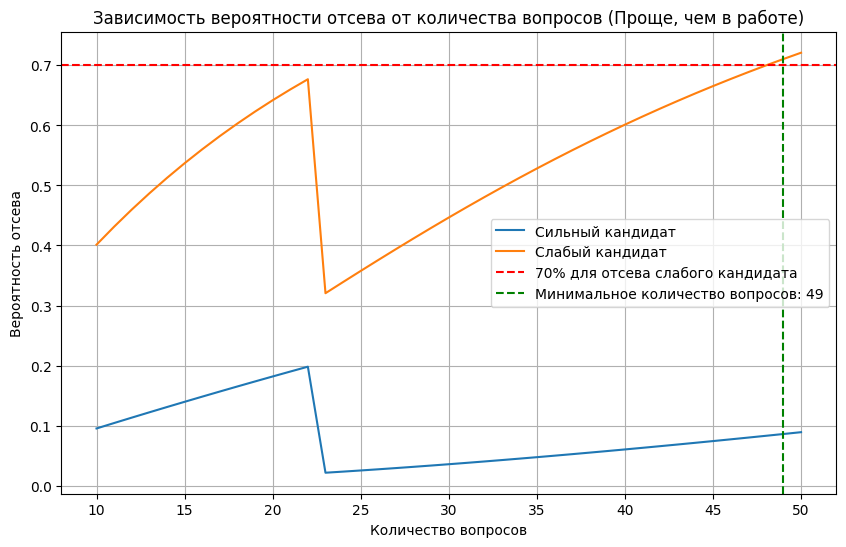

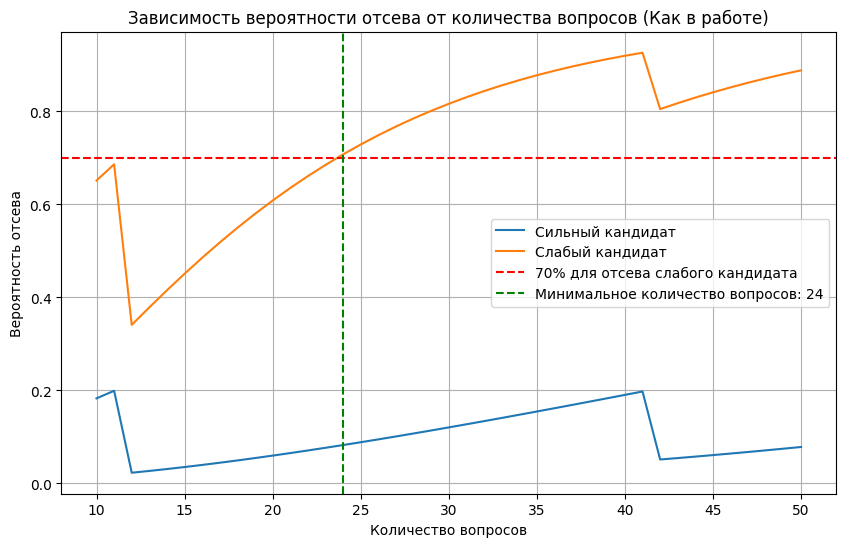

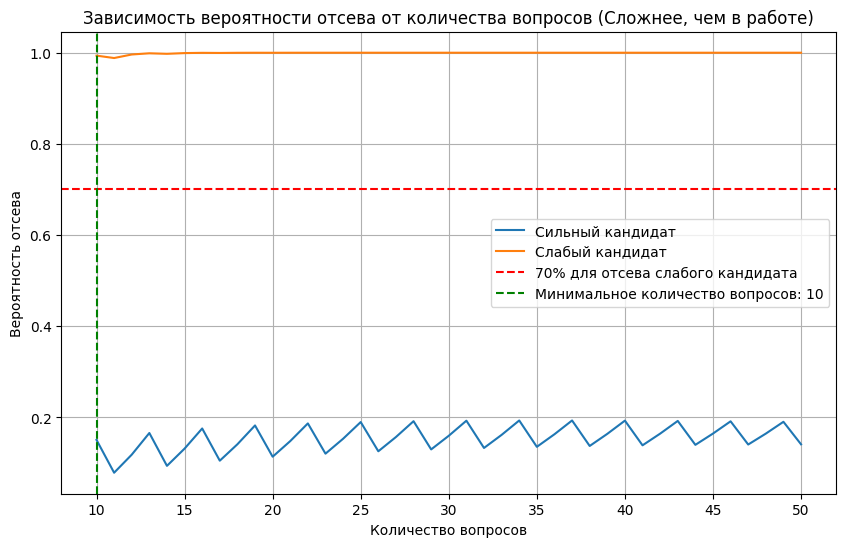

Уровень сложности: Проще, чем в работе
Минимальное количество вопросов: 49
Пороговый балл: 39

Уровень сложности: Как в работе
Минимальное количество вопросов: 24
Пороговый балл: 19

Уровень сложности: Сложнее, чем в работе
Минимальное количество вопросов: 10
Пороговый балл: 8



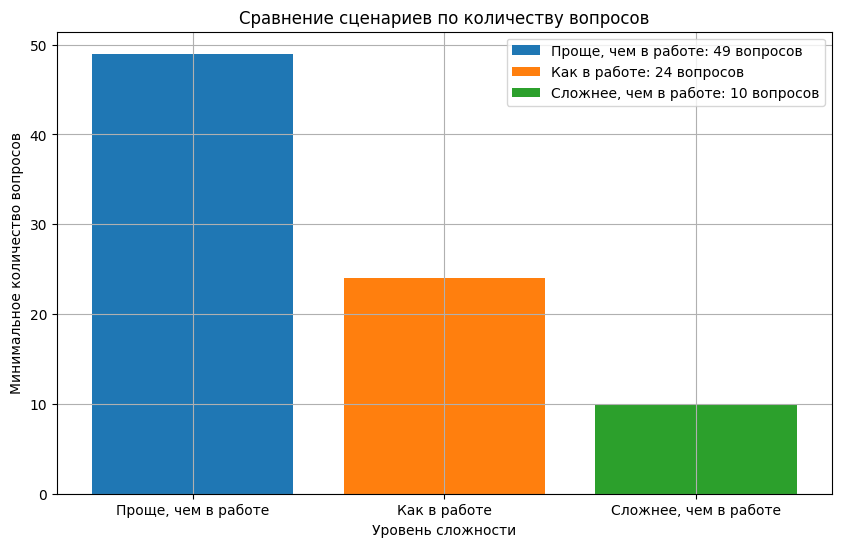

Оптимальный уровень сложности: Сложнее, чем в работе
Минимальное количество вопросов: 10
Пороговый балл: 8


In [6]:
levels = {
    'Проще, чем в работе': {'p_strong': 0.99, 'p_weak': 0.95},
    'Как в работе': {'p_strong': 0.98, 'p_weak': 0.90},
    'Сложнее, чем в работе': {'p_strong': 0.70, 'p_weak': 0.20}
}
results = {}

for level, params in levels.items():
    p_strong = params['p_strong']
    p_weak = params['p_weak']
    min_questions = 10
    max_questions = 50
    questions_range = np.arange(min_questions, max_questions + 1)
    prob_reject_weak = np.zeros(len(questions_range))
    prob_reject_strong = np.zeros(len(questions_range))

    for i, n_questions in enumerate(questions_range):
        thresholds = np.arange(0, n_questions + 1)
        prob_strong = np.zeros(len(thresholds))
        prob_weak = np.zeros(len(thresholds))

        for j, threshold in enumerate(thresholds):
            prob_strong[j] = 1 - binom.cdf(threshold - 1, n_questions, p_strong)
            prob_weak[j] = 1 - binom.cdf(threshold - 1, n_questions, p_weak)

        valid_thresholds = thresholds[prob_strong >= 0.80]
        if len(valid_thresholds) > 0:
            optimal_threshold = valid_thresholds[np.argmin(prob_weak[prob_strong >= 0.80])]
            prob_reject_weak[i] = binom.cdf(optimal_threshold - 1, n_questions, p_weak)
            prob_reject_strong[i] = binom.cdf(optimal_threshold - 1, n_questions, p_strong)
        else:
            prob_reject_weak[i] = 0
            prob_reject_strong[i] = 0

    min_questions_needed = questions_range[prob_reject_weak >= 0.70][0]
    results[level] = {'min_questions': min_questions_needed, 'threshold': int(min_questions_needed * 0.80)}

    plt.figure(figsize=(10, 6))
    plt.plot(questions_range, prob_reject_strong, label='Сильный кандидат')
    plt.plot(questions_range, prob_reject_weak, label='Слабый кандидат')
    plt.axhline(y=0.70, color='r', linestyle='--', label='70% для отсева слабого кандидата')
    plt.axvline(x=min_questions_needed, color='g', linestyle='--', label=f'Минимальное количество вопросов: {min_questions_needed}')
    plt.xlabel('Количество вопросов')
    plt.ylabel('Вероятность отсева')
    plt.title(f'Зависимость вероятности отсева от количества вопросов ({level})')
    plt.legend()
    plt.grid(True)
    plt.show()

for level, result in results.items():
    print(f"Уровень сложности: {level}")
    print(f"Минимальное количество вопросов: {result['min_questions']}")
    print(f"Пороговый балл: {result['threshold']}")
    print()

plt.figure(figsize=(10, 6))
for level, result in results.items():
    plt.bar(level, result['min_questions'], label=f"{level}: {result['min_questions']} вопросов")
plt.xlabel('Уровень сложности')
plt.ylabel('Минимальное количество вопросов')
plt.title('Сравнение сценариев по количеству вопросов')
plt.legend()
plt.grid(True)
plt.show()
optimal_level = min(results, key=lambda k: results[k]['min_questions'])
print(f"Оптимальный уровень сложности: {optimal_level}")
print(f"Минимальное количество вопросов: {results[optimal_level]['min_questions']}")
print(f"Пороговый балл: {results[optimal_level]['threshold']}")